In [19]:
import numpy as np
import pandas as pd

In [20]:
#check orders
ord_df = pd.read_csv('C:/DS/Springboard/1st_capstone_project/orders.csv')
ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [45]:
#check nan
ord_df["days_since_prior_order"].astype(float).isna().sum()

206209

In [12]:
#check unique values in each column
uni_count = [ord_df[column].nunique() for column in ord_df]
uni_count

[3421083, 206209, 3, 100, 7, 24, 31]

In [35]:
#check how many orders each customer make in the three datasets
count_eva = ord_df.groupby('eval_set').count()
count_days = ord_df[(ord_df['eval_set']=='prior')&(ord_df['days_since_prior_order'].isna())].count()
count_eva

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
eval_set,,,,,,
prior,3214874,3214874,3214874,3214874,3214874,3008665
test,75000,75000,75000,75000,75000,75000
train,131209,131209,131209,131209,131209,131209


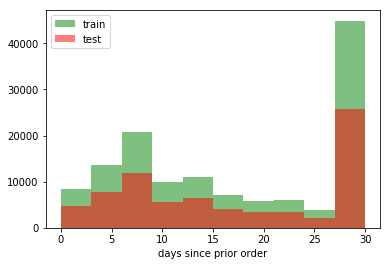

In [38]:
plt.hist(ord_df[ord_df['eval_set']=='train']['days_since_prior_order'],facecolor='g',alpha=0.5,label='train')
plt.hist(ord_df[ord_df['eval_set']=='test']['days_since_prior_order'],facecolor='r',alpha=0.5,label='test')
plt.xlabel('days since prior order')
plt.legend()
plt.show()

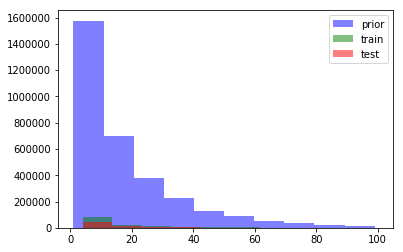

In [17]:
#check how many orders each customer make in the three datasets
#plot histogram of order
import matplotlib.pyplot as plt
plt.hist(ord_df[ord_df['eval_set']=='prior']['order_number'],facecolor='b',alpha=0.5,label='prior')
plt.hist(ord_df[ord_df['eval_set']=='train']['order_number'],facecolor='g',alpha=0.5,label='train')
plt.hist(ord_df[ord_df['eval_set']=='test']['order_number'],facecolor='r',alpha=0.5,label='test')
plt.legend()
plt.show()

C:\Users\cfuth\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\Users\cfuth\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\cfuth\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1856: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\cfuth\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1863: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\cfuth\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1871: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\cfuth\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWar

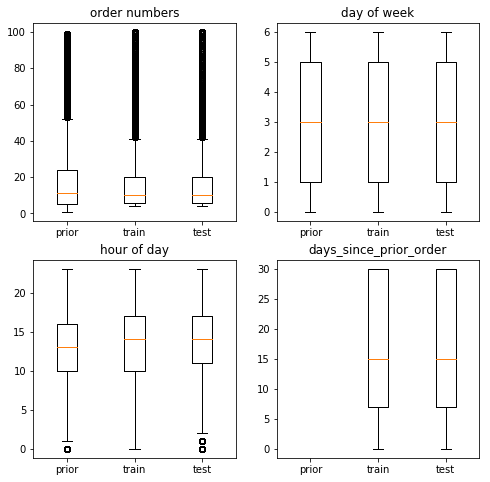

In [32]:
#box plot to show whether there are outliners
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(221)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_number'],ord_df[ord_df['eval_set']=='train']['order_number'],ord_df[ord_df['eval_set']=='test']['order_number']])
a.set_xticks([1,2,3])
a.set_xticklabels(['prior','train','test'])
a.set_title('order numbers')

b = fig.add_subplot(222)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_dow'],ord_df[ord_df['eval_set']=='train']['order_dow'],ord_df[ord_df['eval_set']=='test']['order_dow']])
b.set_xticks([1,2,3])
b.set_xticklabels(['prior','train','test'])
b.set_title('day of week')

c = fig.add_subplot(223)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_hour_of_day'],ord_df[ord_df['eval_set']=='train']['order_hour_of_day'],ord_df[ord_df['eval_set']=='test']['order_hour_of_day']])
c.set_xticks([1,2,3])
c.set_xticklabels(['prior','train','test'])
c.set_title('hour of day')

d = fig.add_subplot(224)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['days_since_prior_order'],ord_df[ord_df['eval_set']=='train']['days_since_prior_order'],ord_df[ord_df['eval_set']=='test']['days_since_prior_order']])
d.set_xticks([1,2,3])
d.set_xticklabels(['prior','train','test'])
d.set_title('days_since_prior_order')
plt.show()